In [1]:
!pwd

/home/darksst/Desktop/Fall24/StatisticalDecisionTheory/Homeworks/HW3


In [2]:
import numpy as np

# Step 1: Load the labels (first column) and features (remaining columns) separately
# Load the labels (class names) as strings (usecols=0)
Y_labels = np.genfromtxt('/home/darksst/Desktop/Fall24/StatisticalDecisionTheory/Data/Image/segmentation.data', 
                         delimiter=',', dtype=str, encoding=None, usecols=0, skip_header=5)

# Load the feature columns (usecols 5, 6, 7, 8, 9 for vedge-mean, vedge-sd, hedge-mean, hedge-sd, intensity-mean)
X = np.genfromtxt('/home/darksst/Desktop/Fall24/StatisticalDecisionTheory/Data/Image/segmentation.data', 
                  delimiter=',', dtype=float, encoding=None, usecols=(5, 6, 7, 8, 9), skip_header=5)

# Step 2: One-hot encode the class labels
unique_classes = np.unique(Y_labels)  # Get the unique class names
num_classes = len(unique_classes)

# Create a one-hot encoded matrix for the labels
Y = np.zeros((Y_labels.shape[0], num_classes))
for i, label in enumerate(Y_labels):
    Y[i, np.where(unique_classes == label)[0][0]] = 1

# Initialize the parameter matrix B with zeros
B = np.zeros((X.shape[1], Y.shape[1]))

# Print shapes to verify everything is correct
print(f"Feature matrix (X) shape: {X.shape}")
print(f"One-hot encoded labels (Y) shape: {Y.shape}")
print(f"Parameter matrix (B) shape: {B.shape}")


Feature matrix (X) shape: (210, 5)
One-hot encoded labels (Y) shape: (210, 7)
Parameter matrix (B) shape: (5, 7)


Final parameter matrix (B) after gradient descent:
 [[-0.14971099  0.01807534  0.04210826 -0.17407528  0.39507939 -0.09048995
  -0.04098676]
 [-0.40499461  0.30574458  0.0821837  -0.23986329  0.12686741 -0.03835932
   0.16842153]
 [ 0.22607379 -0.0598758   0.1060662   0.1963576  -0.1317245  -0.31658102
  -0.02031626]
 [ 0.50881813 -0.20454637 -0.09839031  0.11787755  0.00321485  0.23792029
  -0.56489414]
 [-0.53571175  0.1643402   0.1490457   0.02005765  0.15961267 -0.16777865
   0.21043418]]
Final negative log-likelihood after gradient descent: 1.8069150151666782


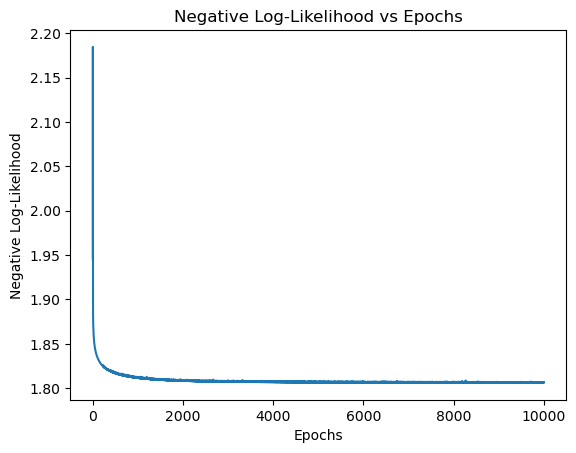

In [3]:
# Softmax function for converting logits to probabilities
def softmax(logits):
    exp_logits = np.exp(logits - np.max(logits, axis=1, keepdims=True))  # For numerical stability
    return exp_logits / np.sum(exp_logits, axis=1, keepdims=True)

# Set hyperparameters
learning_rate = 1e-4  # You can adjust this value if needed
epochs = 10000  # Number of iterations

# Initialize the parameter matrix B with zeros
B = np.zeros((X.shape[1], Y.shape[1]))

# Initialize array to store the negative log-likelihood at each epoch
neg_log_likelihood = np.zeros(epochs)

# Perform gradient descent
for epoch in range(epochs):
    # Step 1: Compute logits (Z = X @ B)
    logits = X @ B
    
    # Step 2: Apply softmax to compute the predicted probabilities
    P = softmax(logits)
    
    # Step 3: Compute the gradient (X.T @ (Y - P))
    gradient = X.T @ (Y - P)
    
    # Step 4: Update the parameters (B += learning_rate * gradient)
    B += learning_rate * gradient

    # Step 5: Compute the negative log-likelihood (cross-entropy loss)
    neg_log_likelihood[epoch] = -np.sum(Y * np.log(P + 1e-9)) / Y.shape[0]  # Adding epsilon for numerical stability

# Print final parameters and final negative log-likelihood after the last epoch
print("Final parameter matrix (B) after gradient descent:\n", B)
print("Final negative log-likelihood after gradient descent:", neg_log_likelihood[-1])

# Plot the negative log-likelihood over epochs
import matplotlib.pyplot as plt

plt.plot(range(epochs), neg_log_likelihood)
plt.xlabel('Epochs')
plt.ylabel('Negative Log-Likelihood')
plt.title('Negative Log-Likelihood vs Epochs')
plt.show()
